In [ ]:
###To Run: Define the files to be read by specifing PRECISION and WORDSIZE
#example: Q16.8 -> precision = 8, wordsize = 24, double = 48
PRECISION = 16
WORDSIZE = 32
D_WORDSIZE = 2*WORDSIZE

In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#f"/content/drive/MyDrive/network-traffic-classification-main/csv-files/p4_outputs_classifications_Q{WORDSIZE-PRECISION}_{PRECISION}.csv"

df_real = pd.read_csv(f"/content/drive/MyDrive/network-traffic-classification-main/csv-files/test_target_1_with_3_attributes.csv")
df_tf = pd.read_csv(f"/content/drive/MyDrive/network-traffic-classification-main/csv-files/tf_outputs_classifications.csv")
df_p4_q16_16 = pd.read_csv(f"/content/drive/MyDrive/network-traffic-classification-main/csv-files/p4_outputs_classifications_Q16_16.csv", index_col = 0)
df_p4_q20_12 = pd.read_csv(f"/content/drive/MyDrive/network-traffic-classification-main/csv-files/p4_outputs_classifications_Q20_12.csv", index_col = 0)
df_p4_q16_8 = pd.read_csv(f"/content/drive/MyDrive/network-traffic-classification-main/csv-files/p4_outputs_classifications_Q16_8.csv", index_col = 0)
df_p4_q20_4 = pd.read_csv(f"/content/drive/MyDrive/network-traffic-classification-main/csv-files/p4_outputs_classifications_Q20_4.csv", index_col = 0)
df_p4_q14_2 = pd.read_csv(f"/content/drive/MyDrive/network-traffic-classification-main/csv-files/p4_outputs_classifications_Q14_2.csv", index_col = 0)

#display(df_real)
display(df_tf)
#display(df_p4_q14_2)

,tf_predictions,0,1,2,3,4,5,6,7,8,9,10,11
0,0,6.285416,-14.875048,-9.030859,-0.991237,4.838453,5.029265,-38.415783,-2.303600,-12.768714,-17.415094,-22.238930,-4.025043
1,0,6.880913,-42.095024,-29.967880,5.293607,5.711986,4.203490,-127.778860,4.724648,-20.630436,-52.907734,-67.614494,-48.838657
2,0,3.767302,-19.471960,-10.082059,1.156922,2.495468,2.889305,-60.518100,2.928370,-10.458627,-19.013813,-30.962774,-21.873577
3,0,7.771894,-17.223017,-16.655777,-4.826715,6.239139,7.027270,-25.021984,-6.931738,-16.180574,-16.726030,-19.696054,4.518942
4,0,3.882621,-20.309855,-10.818572,1.310134,2.614598,2.937979,-63.009247,2.994899,-10.835361,-20.269146,-32.320248,-22.872286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,11,1.707409,-3.413830,-28.130953,-12.468621,0.175844,2.141032,0.702387,-16.130262,-11.309195,-10.025586,2.847668,5.597923
23996,11,1.707409,-3.413830,-28.130953,-12.468621,0.175844,2.141032,0.702387,-16.130262,-11.309195,-10.025586,2.847668,5.597923
23997,11,1.707409,-3.413830,-28.130953,-12.468621,0.175844,2.141032,0.702387,-16.130262,-11.309195,-10.025586,2.847668,5.597923
23998,11,-3.549794,-1.680742,-2.412073,-2.336276,-2.029080,-0.026191,-2.627320,-2.216556,-2.028416,-1.411170,-2.850521,0.067555


In [ ]:
tf_vs_real_hits = (df_real["target"] == df_tf["tf_predictions"]).sum()
tf_vs_real_accuracy = tf_vs_real_hits / len(df_p4_q16_16)
print("TF:")
print("tf_vs_real_hits: ",tf_vs_real_hits, "tf_vs_real_accuracy: ", tf_vs_real_accuracy)
###############################################


p4_vs_tf_hits = (df_tf["tf_predictions"] == df_p4_q16_16["P4_class"]).sum()
p4_vs_real_hits = (df_real["target"] == df_p4_q16_16["P4_class"]).sum()
p4_vs_real_accuracy = p4_vs_real_hits / len(df_p4_q16_16)
p4_vs_tf_accuracy = p4_vs_tf_hits / len(df_p4_q16_16)
print("Q16.16")
print("p4_vs_real_hits: ", p4_vs_real_hits, "p4_vs_real_accuracy: ", p4_vs_real_accuracy)
print("p4_vs_tf_hits: ", p4_vs_tf_hits, "p4_vs_tf_accuracy: ", p4_vs_tf_accuracy)
###############################################

p4_vs_real_hits_q20_12 = (df_real["target"] == df_p4_q20_12["P4_class"]).sum()
p4_vs_tf_hits_q20_12 = (df_tf["tf_predictions"] == df_p4_q20_12["P4_class"]).sum()
p4_vs_real_accuracy_q20_12 = p4_vs_real_hits_q20_12 / len(df_p4_q16_16)
p4_vs_tf_accuracy_q20_12 = p4_vs_tf_hits_q20_12 / len(df_p4_q16_16)
print("Q20.12")
print("p4_vs_real_hits: ", p4_vs_real_hits_q20_12, "p4_vs_real_accuracy: ", p4_vs_real_accuracy_q20_12)
print("p4_vs_tf_hits: ", p4_vs_tf_hits_q20_12, "p4_vs_tf_accuracy: ", p4_vs_tf_accuracy_q20_12)
###############################################

p4_vs_real_hits_q16_8 = (df_real["target"] == df_p4_q16_8["P4_class"]).sum()
p4_vs_tf_hits_q16_8 = (df_tf["tf_predictions"] == df_p4_q16_8["P4_class"]).sum()
p4_vs_real_accuracy_q16_8 = p4_vs_real_hits_q16_8 / len(df_p4_q16_16)
p4_vs_tf_accuracy_q16_8 = p4_vs_tf_hits_q16_8 / len(df_p4_q16_16)
print("Q16.8")
print("p4_vs_real_hits: ", p4_vs_real_hits_q16_8, "p4_vs_real_accuracy: ", p4_vs_real_accuracy_q16_8)
print("p4_vs_tf_hits: ", p4_vs_tf_hits_q16_8, "p4_vs_tf_accuracy: ", p4_vs_tf_accuracy_q16_8)
###############################################

p4_vs_real_hits_q20_4 = (df_real["target"] == df_p4_q20_4["P4_class"]).sum()
p4_vs_tf_hits_q20_4 = (df_tf["tf_predictions"] == df_p4_q20_4["P4_class"]).sum()
p4_vs_real_accuracy_q20_4 = p4_vs_real_hits_q20_4 / len(df_p4_q16_16)
p4_vs_tf_accuracy_q20_4 = p4_vs_tf_hits_q20_4 / len(df_p4_q16_16)
print("Q20.4")
print("p4_vs_real_hits: ", p4_vs_real_hits_q20_4, "p4_vs_real_accuracy: ", p4_vs_real_accuracy_q20_4)
print("p4_vs_tf_hits: ", p4_vs_tf_hits_q20_4, "p4_vs_tf_accuracy: ", p4_vs_tf_accuracy_q20_4)
###############################################

p4_vs_real_hits_q14_2 = (df_real["target"] == df_p4_q14_2["P4_class"]).sum()
p4_vs_tf_hits_q14_2 = (df_tf["tf_predictions"] == df_p4_q14_2["P4_class"]).sum()
p4_vs_real_accuracy_q14_2 = p4_vs_real_hits_q14_2 / len(df_p4_q16_16)
p4_vs_tf_accuracy_q14_2 = p4_vs_tf_hits_q14_2 / len(df_p4_q16_16)
print("Q14.2")
print("p4_vs_real_hits: ", p4_vs_real_hits_q14_2, "p4_vs_real_accuracy: ", p4_vs_real_accuracy_q14_2)
print("p4_vs_tf_hits: ", p4_vs_tf_hits_q14_2, "p4_vs_tf_accuracy: ", p4_vs_tf_accuracy_q14_2)
###############################################



TF:
tf_vs_real_hits:  15796 tf_vs_real_accuracy:  0.6581666666666667
Q16.16
p4_vs_real_hits:  15796 p4_vs_real_accuracy:  0.6581666666666667
p4_vs_tf_hits:  24000 p4_vs_tf_accuracy:  1.0
Q20.12
p4_vs_real_hits:  15796 p4_vs_real_accuracy:  0.6581666666666667
p4_vs_tf_hits:  24000 p4_vs_tf_accuracy:  1.0
Q16.8
p4_vs_real_hits:  15793 p4_vs_real_accuracy:  0.6580416666666666
p4_vs_tf_hits:  23933 p4_vs_tf_accuracy:  0.9972083333333334
Q20.4
p4_vs_real_hits:  15428 p4_vs_real_accuracy:  0.6428333333333334
p4_vs_tf_hits:  20476 p4_vs_tf_accuracy:  0.8531666666666666
Q14.2
p4_vs_real_hits:  11794 p4_vs_real_accuracy:  0.49141666666666667
p4_vs_tf_hits:  14625 p4_vs_tf_accuracy:  0.609375


In [ ]:
p4_probabilities_list = df_p4_q16_16.values.tolist()
tf_probabilities_list = df_tf.values.tolist()
differences = np.zeros((df_p4_q16_16.shape[0], df_p4_q16_16.shape[1]))

for i in range(df_p4_q16_16.shape[0]):
  for j in range(df_p4_q16_16.shape[1]):
    differences[i][j] = abs(p4_probabilities_list[i][j] - tf_probabilities_list[i][j])

max_value = max(differences[0])
min_value = min(differences[0])
for row in differences[1:]:
    max_value = max(max_value, max(row))
    min_value = min(min_value, min(row))

print("Q16.16")
print("max: ",max_value,"min: ", min_value)
df_differences = pd.DataFrame(differences)


###############################################
p4_probabilities_list_q20_12 = df_p4_q20_12.values.tolist()
differences_q20_12 = np.zeros((df_p4_q20_12.shape[0], df_p4_q20_12.shape[1]))

for i in range(df_p4_q20_12.shape[0]):
  for j in range(df_p4_q20_12.shape[1]):
    differences_q20_12[i][j] = abs(p4_probabilities_list_q20_12[i][j] - tf_probabilities_list[i][j])

max_value = max(differences_q20_12[0])
min_value = min(differences_q20_12[0])
for row in differences_q20_12[1:]:
    max_value = max(max_value, max(row))
    min_value = min(min_value, min(row))

print("Q20.12")
print("max: ",max_value,"min: ", min_value)
df_differences_q20_12 = pd.DataFrame(differences_q20_12)

###############################################
p4_probabilities_list_q16_8 = df_p4_q16_8.values.tolist()
differences_q16_8 = np.zeros((df_p4_q16_8.shape[0], df_p4_q16_8.shape[1]))

for i in range(df_p4_q16_8.shape[0]):
  for j in range(df_p4_q16_8.shape[1]):
    differences_q16_8[i][j] = abs(p4_probabilities_list_q16_8[i][j] - tf_probabilities_list[i][j])

max_value = max(differences_q16_8[0])
min_value = min(differences_q16_8[0])
for row in differences_q16_8[1:]:
    max_value = max(max_value, max(row))
    min_value = min(min_value, min(row))

print("Q16.8")
print("max: ",max_value,"min: ", min_value)
df_differences_q16_8 = pd.DataFrame(differences_q16_8)

###############################################
p4_probabilities_list_q20_4 = df_p4_q20_4.values.tolist()
differences_q20_4 = np.zeros((df_p4_q20_4.shape[0], df_p4_q20_4.shape[1]))

for i in range(df_p4_q20_4.shape[0]):
  for j in range(df_p4_q20_4.shape[1]):
    differences_q20_4[i][j] = abs(p4_probabilities_list_q20_4[i][j] - tf_probabilities_list[i][j])

max_value = max(differences_q20_4[0])
min_value = min(differences_q20_4[0])
for row in differences_q20_4[1:]:
    max_value = max(max_value, max(row))
    min_value = min(min_value, min(row))

print("Q20.4")
print("max: ",max_value,"min: ", min_value)
df_differences_q20_4 = pd.DataFrame(differences_q20_4)

Q16.16
max:  0.002338959960923148 min:  0.0
Q20.12
max:  0.035518671875024665 min:  0.0
Q16.8
max:  9.0 min:  0.0
Q20.4
max:  10.0 min:  0.0


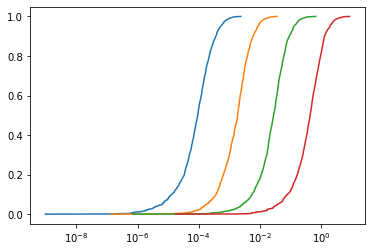

In [ ]:
errors_q16_16 = []
errors_q16_8 = []
errors_q20_4 = []
errors_q20_12 = []


for i in range(1,13):
  errors_q16_16 = errors_q16_16 + df_differences[i].values.tolist()

plt.plot(sorted(errors_q16_16),np.arange(len(errors_q16_16))/len(errors_q16_16))

for i in range(1,13):
  errors_q20_12 = errors_q20_12 + df_differences_q20_12[i].values.tolist()

plt.plot(sorted(errors_q20_12),np.arange(len(errors_q20_12))/len(errors_q20_12))


for i in range(1,13):
  errors_q16_8 = errors_q16_8 + df_differences_q16_8[i].values.tolist()

plt.plot(sorted(errors_q16_8),np.arange(len(errors_q16_8))/len(errors_q16_8))

for i in range(1,13):
  errors_q20_4 = errors_q20_4 + df_differences_q20_4[i].values.tolist()

plt.plot(sorted(errors_q20_4),np.arange(len(errors_q20_4))/len(errors_q20_4))

plt.xscale("log")



In [ ]:
# df_tf = df_tf.head(1000)
# df_p4 = df_p4.head(1000)

# differences_zeros = np.zeros((df_p4.shape[0], df_p4.shape[1]))
# print(differences_zeros.shape)
# df_differences = pd.DataFrame(differences_zeros)

# for i in range(df_p4.shape[0]):
#   for j in range(df_p4.shape[1]):
#     df_differences.loc[i][j] = abs(df_p4.loc[i][j] - df_tf.loc[i][j])

# display(df_differences)


In [ ]:
# df_p4.drop(columns=df_p4.columns[0], axis=1, inplace=True)
# p4_predictions = df_p4.columns[0]
# df_p4.drop(columns=df_p4.columns[0], axis=1, inplace=True)
# displaydf_p4_q16_16

# tf_predictions = df_tf.columns[0]
# df_tf.drop(columns=df_tf.columns[0], axis=1, inplace=True)
# display(df_tf)
